<h2 align="center" style="color:brown;font-size:200%">Lab 1: Simple MDP</h2>

## **Introduction:**

Artificial Intelligence (AI) and reinforcement learning are pivotal in solving complex real-world problems, such as autonomous navigation and decision-making. Markov Decision Processes (MDP) provide a robust framework to model and solve such problems systematically. In this report, two scenarios are explored:

1. **Self-Driving Car at an Intersection**: A self-driving car must safely navigate an intersection by deciding whether to stop or drive based on the traffic light status. The goal is to maximize progress while ensuring adherence to traffic rules and avoiding collisions.

2. **Robot Navigation in a Grid World**: A robot navigates a grid to reach a goal cell while avoiding obstacles. The environment is modeled with clearly defined states, actions, and rewards to guide the robot's decision-making.

Both problems are formalized using MDP principles, which involve defining states, actions, transition probabilities, reward functions, and policies. OpenAI Gym, a widely used toolkit for developing reinforcement learning solutions, is employed to implement and simulate these scenarios. This report details the MDP formalization, policy development, and solutions for both scenarios, highlighting the power of reinforcement learning in AI-driven decision-making.


# Question 1

This problem can be modeled as a **Markov Decision Process (MDP)**, where the self-driving car must decide whether to stop or drive through the intersection based on the traffic light state and other possible factors. Let's break this down step by step.

### 1. Defining the MDP Components

#### States (S)
The states should capture the environment and key factors that impact decision-making:
- `S1`: Car approaching the intersection, light is green.
- `S2`: Car approaching the intersection, light is red.
- `S3`: Car stopped at the red light.
- `S4`: Car proceeding through the intersection.
- `S5`: Car has crossed the intersection.


#### Actions (A)
The car can take the following actions at each state:
- `A1`: Stop the car.
- `A2`: Drive through the intersection.
- `A3`: Wait (if the light is red).

#### Transition Probabilities (P)
The probability of transitioning from one state to another, given a specific action. These probabilities would be based on the traffic light timing and external conditions:
- From `S1`, if the car drives through (`A2`), it transitions to `S4` (probability 1 if no other obstacles).
- From `S2`, if the car stops (`A1`), it transitions to `S3`.
- From `S2`, if the car drives through (`A2`), it risks transitioning to an accident state (not explicitly listed) or violating a traffic rule.
- From `S3`, the car can eventually transition to `S1` again once the light turns green.


#### Reward Function (R)
The reward function reflects the car's objectives:
- Positive reward for successfully crossing the intersection without violating rules.
- Negative reward (penalty) for accidents or violating traffic rules.
- Small negative reward for waiting at the red light (since waiting reduces progress).

Consideration:
- Crossing at a green light: `+75`
- Stopping at a red light: `-25` (small penalty for waiting).
- Running a red light: `-75` (huge penalty for violating rules).
- Accident: `-7575`.

#### Discount Factor (γ)
The discount factor represents how much the agent values future rewards:
- If the problem is to maximize long-term progress while safely navigating, a typical value is `γ = 0.9`. This ensures that immediate rewards are slightly more valuable, but future rewards are still important.

### 2. MDP Formalization

The MDP is formalized as a tuple:  
`MDP = (S, A, P, R, γ)`, where:
- `S` is the set of states representing the car's position relative to the intersection and the traffic light.
- `A` is the set of actions: stop, drive through, or wait.
- `P` defines the transition probabilities between states given actions.
- `R` is the reward function incentivizing progress while penalizing rule violations.
- `γ` is the discount factor that balances immediate versus future rewards.

### 3. Define the Policy

The policy is a function that maps states to actions:  
`π(s) -> a`.

For example:
- In state `S1` (green light), the policy might be to drive through (`A2`).
- In state `S2` (red light), the policy might be to stop (`A1`).
- In state `S3`, the policy could be to wait until the light turns green.

### 4. Solve the MDP

This MDP can be solved using **value iteration** or **policy iteration** algorithms. These methods iterate over states and actions to compute the optimal policy that maximizes the expected cumulative reward.

- **Value Iteration** computes the value of each state using the Bellman equation and updates the policy accordingly.
- **Policy Iteration** alternates between evaluating the current policy and improving it.


 Initial State 
Traffic light: red
Pedestrian: False
Distance to intersection: 100.0
Weather: clear
Road type: urban
Traffic density: medium
Speed: 43.883619639259905


 Epoch 1 
Action Taken: Deceleration
Reason for Action: Speed reduced by random deceleration
Speed: 37.21 km/h
Distance to Intersection: 89.66 m
Traffic Light: red
Pedestrian: False
Weather: clear
Road Type: urban
Traffic Density: medium
Reward: -89.66
Net Reward: -89.66


 Epoch 2 
Action Taken: Acceleration
Reason for Action: Speed increased by random acceleration
Speed: 43.48 km/h
Distance to Intersection: 77.58 m
Traffic Light: red
Pedestrian: False
Weather: clear
Road Type: urban
Traffic Density: medium
Reward: -77.58
Net Reward: -167.25


 Epoch 3 
Action Taken: Deceleration
Reason for Action: Speed reduced by random deceleration
Speed: 34.38 km/h
Distance to Intersection: 68.03 m
Traffic Light: red
Pedestrian: False
Weather: clear
Road Type: urban
Traffic Density: medium
Reward: -68.03
Net Reward: -235.28


 Epoc

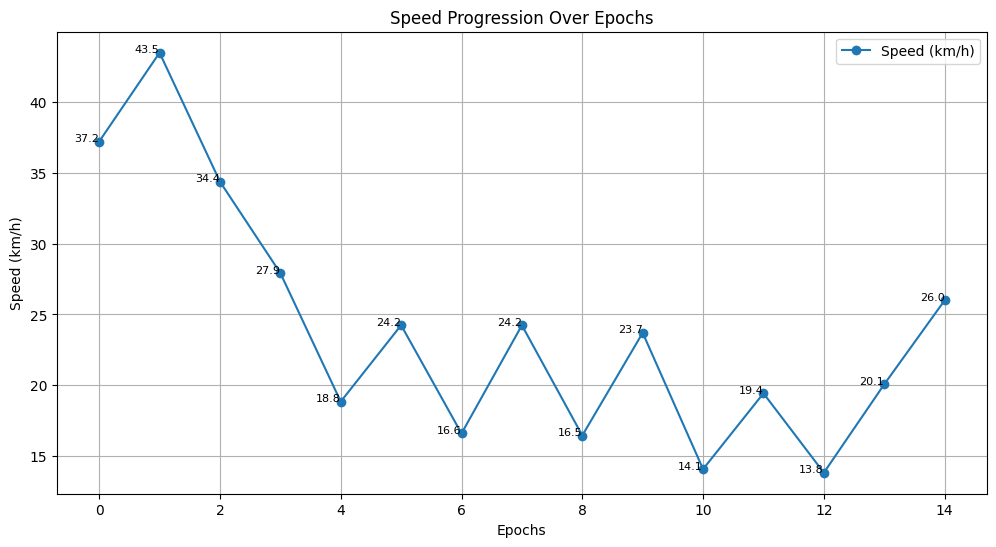

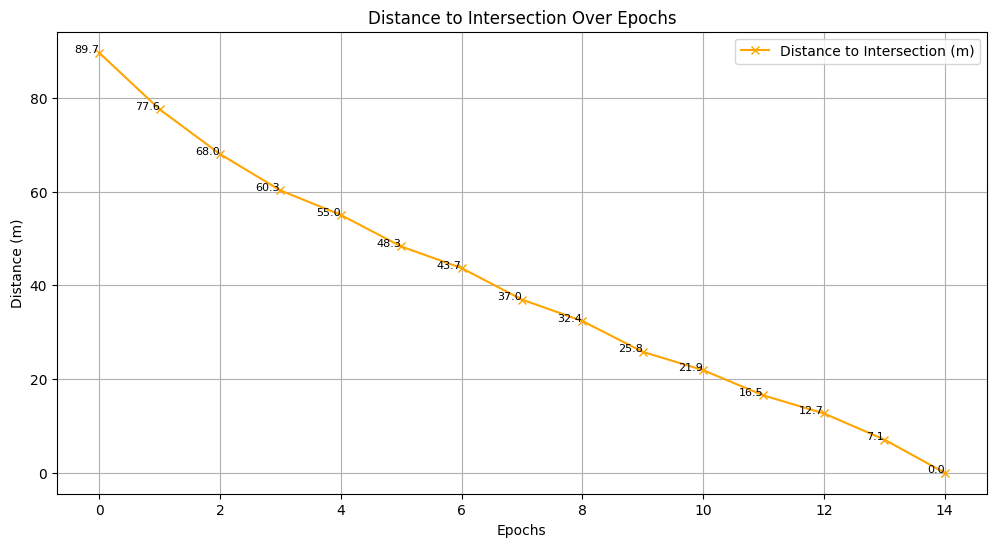

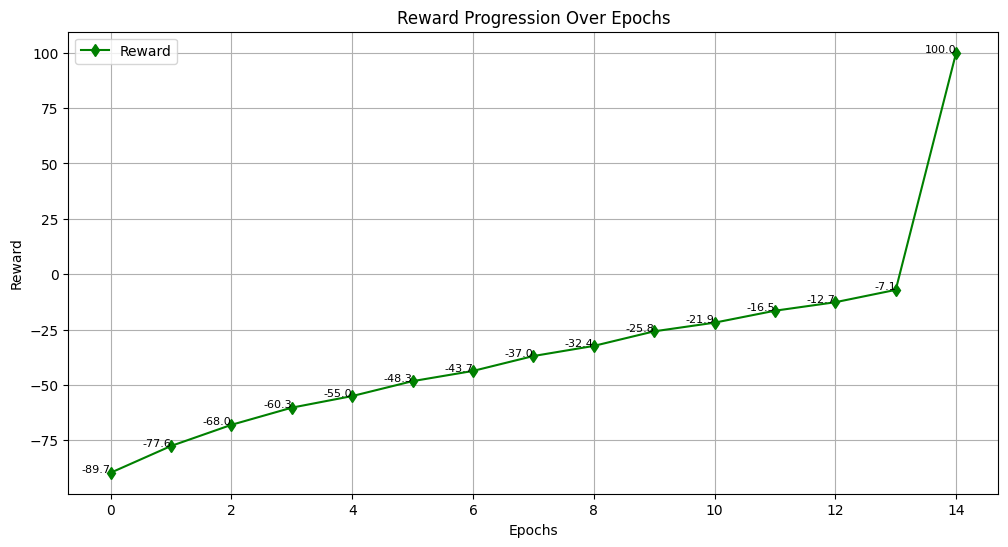

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class TrafficEnvironmentWithEpochs:
    def __init__(self, max_epochs=100, distance_threshold=0):
        self.max_epochs = max_epochs
        self.distance_threshold = distance_threshold
        self.epoch = 0
        self.net_reward = 0

        # Initialize state
        self.state = {
            'traffic_light': 'red',
            'pedestrian': False,
            'distance_to_intersection': 100.0,
            'weather': 'clear',
            'road_type': 'urban',
            'traffic_density': 'medium',
        }
        self.state['speed'] = self.initialize_speed()

        # Initialize history
        self.history = {
            'epoch': [],
            'speed': [],
            'distance_to_intersection': [],
            'reward': [],
            'net_reward': [],
            'traffic_light': [],
            'pedestrian': [],
            'weather': [],
            'road_type': [],
            'traffic_density': [],
        }

        # Display initial state
        self.print_initial_state()

    def initialize_speed(self):
        road_type = 'urban'  # Default to 'urban' during initialization
        if road_type == 'urban':
            return np.random.uniform(30, 50)
        elif road_type == 'rural':
            return np.random.uniform(50, 80)
        elif road_type == 'highway':
            return np.random.uniform(80, 120)
        return 30

    def get_max_speed(self):
        weather = self.state['weather']
        traffic_density = self.state['traffic_density']
        if weather in ['rain', 'fog']:
            max_speed = 70
        else:
            max_speed = 100
        if traffic_density == 'high':
            max_speed -= 20
        elif traffic_density == 'low':
            max_speed += 10
        return max(30, max_speed)

    def step(self):
        speed = self.state['speed']
        distance = self.state['distance_to_intersection']
        
        # Determine the action: Deceleration or Acceleration
        if np.random.random() < 0.5:
            action = 'Deceleration'
            speed = max(10, speed - np.random.uniform(5, 10))
            reason = 'Speed reduced by random deceleration'
        else:
            action = 'Acceleration'
            speed = min(self.get_max_speed(), speed + np.random.uniform(5, 10))
            reason = 'Speed increased by random acceleration'
        
        # Update distance
        distance -= speed / 3.6
        distance = max(0, distance)  # Ensure distance doesn't go negative
        reward = -distance if distance > 0 else 100  # Reward for reaching zero
        self.net_reward += reward
        
        # Log the state and result for this epoch
        self.history['epoch'].append(self.epoch)
        self.history['speed'].append(speed)
        self.history['distance_to_intersection'].append(distance)
        self.history['reward'].append(reward)
        self.history['net_reward'].append(self.net_reward)
        
        # Additional states to track
        self.history['traffic_light'].append(self.state['traffic_light'])
        self.history['pedestrian'].append(self.state['pedestrian'])
        self.history['weather'].append(self.state['weather'])
        self.history['road_type'].append(self.state['road_type'])
        self.history['traffic_density'].append(self.state['traffic_density'])
        
        self.state['speed'] = speed
        self.state['distance_to_intersection'] = distance
        
        # Print the results in the desired format
        self.print_epoch_result(action, reason, reward)

    def print_initial_state(self):
        print("==============================")
        print(" Initial State ")
        print("==============================")
        for key, value in self.state.items():
            print(f"{key.capitalize().replace('_', ' ')}: {value}")
        print("==============================\n")

    def print_epoch_result(self, action, reason, reward):
        # Print the state and results for this epoch in a structured way
        print(f"\n==============================")
        print(f" Epoch {self.epoch + 1} ")
        print("==============================")
        print(f"Action Taken: {action}")
        print(f"Reason for Action: {reason}")
        print(f"Speed: {self.state['speed']:.2f} km/h")
        print(f"Distance to Intersection: {self.state['distance_to_intersection']:.2f} m")
        print(f"Traffic Light: {self.state['traffic_light']}")
        print(f"Pedestrian: {self.state['pedestrian']}")
        print(f"Weather: {self.state['weather']}")
        print(f"Road Type: {self.state['road_type']}")
        print(f"Traffic Density: {self.state['traffic_density']}")
        print(f"Reward: {reward:.2f}")
        print(f"Net Reward: {self.net_reward:.2f}")
        print("==============================\n")

    def run(self):
        # Run simulation until max_epochs or distance threshold is reached
        while self.epoch < self.max_epochs:
            self.step()
            self.epoch += 1
            if self.state['distance_to_intersection'] <= self.distance_threshold:
                break
        print(f"Simulation completed in {self.epoch} epochs.")
        return self.history

    def plot_results(self):
        history = self.history
        epochs = history['epoch']
        speeds = history['speed']
        distances = history['distance_to_intersection']
        rewards = history['reward']

        # Speed Plot
        plt.figure(figsize=(12, 6))
        plt.plot(epochs, speeds, label='Speed (km/h)', marker='o')
        for x, y in zip(epochs, speeds):
            plt.text(x, y, f"{y:.1f}", ha='right', fontsize=8)
        plt.xlabel('Epochs')
        plt.ylabel('Speed (km/h)')
        plt.title('Speed Progression Over Epochs')
        plt.legend()
        plt.grid()
        plt.show()

        # Distance Plot
        plt.figure(figsize=(12, 6))
        plt.plot(epochs, distances, label='Distance to Intersection (m)', color='orange', marker='x')
        for x, y in zip(epochs, distances):
            plt.text(x, y, f"{y:.1f}", ha='right', fontsize=8)
        plt.xlabel('Epochs')
        plt.ylabel('Distance (m)')
        plt.title('Distance to Intersection Over Epochs')
        plt.legend()
        plt.grid()
        plt.show()

        # Reward Plot
        plt.figure(figsize=(12, 6))
        plt.plot(epochs, rewards, label='Reward', color='green', marker='d')
        for x, y in zip(epochs, rewards):
            plt.text(x, y, f"{y:.1f}", ha='right', fontsize=8)
        plt.xlabel('Epochs')
        plt.ylabel('Reward')
        plt.title('Reward Progression Over Epochs')
        plt.legend()
        plt.grid()
        plt.show()


# Create environment and run simulation
env = TrafficEnvironmentWithEpochs(max_epochs=100, distance_threshold=0)
history = env.run()
env.plot_results()


# Question 2

### 1. Defining the MDP Components

#### States (S)
Each cell in the 4x4 grid represents a state. The grid has 16 cells in total, so there are 16 states:
- `S = {S_0, S_1, ..., S_15}`

States can be represented using a tuple `(x, y)` where `x` is the row index and `y` is the column index. For example:
- `S_0 = (0, 0)`: Top-left corner.
- `S_15 = (3, 3)`: Bottom-right corner (goal state).

#### Actions (A)
The robot can move in four directions:
- `A = {UP, DOWN, LEFT, RIGHT}`.

#### Transition Probabilities (P)
The robot's transitions between states are deterministic in this case, meaning that each action deterministically moves the robot to the adjacent cell unless it hits a boundary or obstacle. However, you can include some stochasticity (uncertainty in action outcomes) to make the problem more interesting, where the robot might end up in a neighboring cell with some probability.

For simplicity, let's assume deterministic transitions:
- If the robot moves UP from `(2, 1)`, it moves to `(1, 1)`, unless it's blocked by an obstacle or boundary.

#### Reward Function (R)
The reward function incentivizes the robot to reach the goal while avoiding obstacles:
- Reward for reaching the goal: `+10`
- Penalty for hitting an obstacle: `-5`
- Small negative reward for each move to encourage shorter paths: `-1`.

#### Discount Factor (γ)
The discount factor determines how much the robot values future rewards:
- Choose `γ = 0.9` to balance immediate rewards with long-term rewards.

### 2. MDP Formalization

The MDP can be formalized as a tuple:  
`MDP = (S, A, P, R, γ)`, where:
- `S`: Set of all grid cells (states).
- `A`: Set of actions: UP, DOWN, LEFT, RIGHT.
- `P`: Transition probabilities between states given actions.
- `R`: Reward function (goal, penalty for obstacles, step cost).
- `γ`: Discount factor.

### 3. Defining the Policy

The policy defines the robot's behavior by mapping states to actions:
- `π(s) -> a`: In each state `s`, the policy selects the action `a` that maximizes the expected future reward.

An optimal policy would guide the robot from any starting position toward the goal, while avoiding obstacles and minimizing the number of steps.

### Explanation:

- **State**: The environment keeps track of the robot's current position in the grid.
- **Action Space**: The robot can move in four directions: UP, DOWN, LEFT, RIGHT.
- **Obstacles**: Some cells (5, 7, 11) contain obstacles. If the robot moves into these cells, it stays in its previous state and receives a penalty.
- **Reward**: The robot receives a reward for reaching the goal, a penalty for hitting obstacles, and a small negative reward for each step to encourage the shortest path.
- **Rendering**: The grid is displayed, with `R` representing the robot, `X` representing obstacles, and `G` representing the goal.


In [70]:
import gym
from gym import spaces
import numpy as np

class GridWorldEnv(gym.Env):
    def __init__(self):
        super(GridWorldEnv, self).__init__()
        
        # Define action and observation space
        self.action_space = spaces.Discrete(4)  # UP, DOWN, LEFT, RIGHT
        self.observation_space = spaces.Discrete(16)  # 4x4 grid
        
        self.grid_size = 4
        self.state = np.random.randint(0, 16)  # Random start position
        self.goal_state = 15  # Bottom-right corner
        self.obstacles = [5, 7, 11]  # List of obstacle positions

        # Rewards
        self.step_cost = -1
        self.goal_reward = 10
        self.obstacle_penalty = -5
        
        self.done = False

    def reset(self):
        self.state = np.random.randint(0, 16)  # Random start position
        while self.state in self.obstacles:
            self.state = np.random.randint(0,16)
        self.done = False
        return self.state

    def step(self, action):
        x, y = self.state // self.grid_size, self.state % self.grid_size
        reward = self.step_cost

        # Apply action
        if action == 0:  # UP
            x = max(x - 1, 0)
        elif action == 1:  # DOWN
            x = min(x + 1, self.grid_size - 1)
        elif action == 2:  # LEFT
            y = max(y - 1, 0)
        elif action == 3:  # RIGHT
            y = min(y + 1, self.grid_size - 1)

        next_state = x * self.grid_size + y
        
        # Check if next state is an obstacle
        if next_state in self.obstacles:
            reward = self.obstacle_penalty
            next_state = self.state  # Stay in the same position

        # Check if reached the goal
        if next_state == self.goal_state:
            reward = self.goal_reward
            self.done = True

        # Update state
        self.state = next_state
        
        return self.state, reward, self.done, {}

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size), dtype=str)
        grid[:] = '_'
        for obstacle in self.obstacles:
            ox, oy = obstacle // self.grid_size, obstacle % self.grid_size
            grid[ox, oy] = 'X'  # Mark obstacles

        gx, gy = self.goal_state // self.grid_size, self.goal_state % self.grid_size
        grid[gx, gy] = 'G'  # Mark goal

        sx, sy = self.state // self.grid_size, self.state % self.grid_size
        grid[sx, sy] = 'R'  # Mark robot's position

        print("\n".join([" ".join(row) for row in grid]))
        print()

print("R - Robot Position\nG - Goal\nX - Obstacle")
# Test the environment
env = GridWorldEnv()
state = env.reset()
env.render()

for _ in range(100):
    action = env.action_space.sample()  # Random action
    if action == 0:
        print("UP")
    elif action == 1:
        print("DOWN")
    elif action == 2:
        print("LEFT")
    elif action == 3:
        print("RIGHT")
    next_state, reward, done, _ = env.step(action)
    print(f"Reward: {reward}")
    env.render()
    if done:
        break


R - Robot Position
G - Goal
X - Obstacle
_ _ _ R
_ X _ X
_ _ _ X
_ _ _ G

RIGHT
Reward: -1
_ _ _ R
_ X _ X
_ _ _ X
_ _ _ G

LEFT
Reward: -1
_ _ R _
_ X _ X
_ _ _ X
_ _ _ G

UP
Reward: -1
_ _ R _
_ X _ X
_ _ _ X
_ _ _ G

RIGHT
Reward: -1
_ _ _ R
_ X _ X
_ _ _ X
_ _ _ G

LEFT
Reward: -1
_ _ R _
_ X _ X
_ _ _ X
_ _ _ G

RIGHT
Reward: -1
_ _ _ R
_ X _ X
_ _ _ X
_ _ _ G

LEFT
Reward: -1
_ _ R _
_ X _ X
_ _ _ X
_ _ _ G

DOWN
Reward: -1
_ _ _ _
_ X R X
_ _ _ X
_ _ _ G

DOWN
Reward: -1
_ _ _ _
_ X _ X
_ _ R X
_ _ _ G

RIGHT
Reward: -5
_ _ _ _
_ X _ X
_ _ R X
_ _ _ G

RIGHT
Reward: -5
_ _ _ _
_ X _ X
_ _ R X
_ _ _ G

DOWN
Reward: -1
_ _ _ _
_ X _ X
_ _ _ X
_ _ R G

RIGHT
Reward: 10
_ _ _ _
_ X _ X
_ _ _ X
_ _ _ R



## **Conclusion:**

This report demonstrates the application of Markov Decision Processes (MDP) in solving complex decision-making problems through reinforcement learning.

The implementation ensured safe and efficient navigation of the intersection while adhering to traffic laws. The solution modeled the interaction between states, actions, and rewards effectively, emphasizing the importance of safety in autonomous driving.

The robot successfully navigated a grid environment with obstacles, optimizing its path to the goal state. The MDP framework enabled systematic modeling, and the policy ensured efficient navigation despite environmental constraints.

The experiments underscore the value of MDPs in building robust AI systems capable of learning and adapting to dynamic environments. Future work may involve enhancing the complexity of scenarios and incorporating more realistic dynamics to further explore the potential of reinforcement learning in AI applications.
